In [2]:
import pandas as pd
import os
import nltk
import datetime as dt
import numpy as np
from datetime import timedelta


In [27]:
transcript_path = os.path.join("..", "transcript_list.csv")
df_all = pd.read_csv(transcript_path)
df_ECT = df_all[df_all['Title'].str.contains("Earnings Call Transcript")]
df_ECT

,Title,URL,Date,Symbol
0,Apple Inc. (AAPL) CEO Tim Cook on Q4 2020 Resu...,/article/4382943-apple-inc-aapl-ceo-tim-cook-o...,10/29/2020,AAPL
1,Apple Inc. (AAPL) CEO Tim Cook on Q3 2020 Resu...,/article/4362707-apple-inc-aapl-ceo-tim-cook-o...,7/30/2020,AAPL
2,Apple Inc. (AAPL) CEO Tim Cook on Q2 2020 Resu...,/article/4341792-apple-inc-aapl-ceo-tim-cook-o...,4/30/2020,AAPL
3,Apple Inc. (AAPL) CEO Tim Cook on Q1 2020 Resu...,/article/4319666-apple-inc-aapl-ceo-tim-cook-o...,1/28/2020,AAPL
8,AbbVie Inc.'s (ABBV) CEO Rick Gonzalez on Q3 2...,/article/4383381-abbvie-inc-s-abbv-ceo-rick-go...,10/30/2020,ABBV
...,...,...,...,...
1031,"Walmart, Inc. (WMT) CEO Doug McMillon on Q1 20...",/article/4348814-walmart-inc-wmt-ceo-doug-mcmi...,5/19/2020,WMT
1035,Exxon Mobil Corporation (XOM) Q3 2020 Results ...,/article/4383411-exxon-mobil-corporation-xom-q...,10/30/2020,XOM
1037,Exxon Mobil Corp (XOM) Q2 2020 Results - Earni...,/article/4363013-exxon-mobil-corp-xom-q2-2020-...,7/31/2020,XOM
1039,Exxon Mobil Corporation (XOM) CEO Darren Woods...,/article/4342148-exxon-mobil-corporation-xom-c...,5/1/2020,XOM


In [28]:
titles = df_ECT['Title'].tolist()
#titles

In [32]:
# Open a file: file
one_title = titles[0]
file_path = os.path.join('..', 'transcripts', one_title +'.txt')
file = open(file_path,mode='r')
 
# read all lines at once
all_of_it = file.read()
 
# close the file
file.close()

In [8]:
#all_of_it
from utils import preprocess_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cdubi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cdubi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cdubi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
processed_text = preprocess_text(all_of_it)

In [44]:
len(processed_text)

4122

In [46]:
len(set(processed_text))

1180

In [56]:
df_ECT['body'] = ''

In [57]:
df_ECT = df_ECT.set_index('Title')

In [58]:
df_ECT

,index,URL,Date,Symbol,date_plus_28,date_plus_7,date_plus_1,Price,price_plus_28,price_plus_7,price_plus_1,return_28,return_7,return_1,rating_28,rating_7,rating_1,body
Title,,,,,,,,,,,,,,,,,,
Apple Inc. (AAPL) CEO Tim Cook on Q4 2020 Results - Earnings Call Transcript,0,/article/4382943-apple-inc-aapl-ceo-tim-cook-o...,2020-10-29,AAPL,2020-11-26,2020-11-05,2020-10-30,115.320000,116.589996,119.029999,108.860001,0.011013,0.032171,-0.056018,hold,hold,sell,
Apple Inc. (AAPL) CEO Tim Cook on Q3 2020 Results - Earnings Call Transcript,1,/article/4362707-apple-inc-aapl-ceo-tim-cook-o...,2020-07-30,AAPL,2020-08-27,2020-08-06,2020-07-31,96.190002,125.010002,113.902496,106.260002,0.299615,0.184141,0.104689,buy,buy,buy,
Apple Inc. (AAPL) CEO Tim Cook on Q2 2020 Results - Earnings Call Transcript,2,/article/4341792-apple-inc-aapl-ceo-tim-cook-o...,2020-04-30,AAPL,2020-05-28,2020-05-07,2020-05-01,73.449997,79.562500,75.934998,72.267502,0.083220,0.033833,-0.016099,buy,hold,hold,
Apple Inc. (AAPL) CEO Tim Cook on Q1 2020 Results - Earnings Call Transcript,3,/article/4319666-apple-inc-aapl-ceo-tim-cook-o...,2020-01-28,AAPL,2020-02-25,2020-02-04,2020-01-29,79.422501,72.019997,79.712502,81.084999,-0.093204,0.003651,0.020932,sell,hold,hold,
AbbVie Inc.'s (ABBV) CEO Rick Gonzalez on Q3 2020 Results - Earnings Call Transcript,4,/article/4383381-abbvie-inc-s-abbv-ceo-rick-go...,2020-10-30,ABBV,2020-11-27,2020-11-06,2020-10-31,85.099998,104.889999,92.849998,88.250000,0.232550,0.091069,0.037015,buy,buy,hold,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Walmart, Inc. (WMT) CEO Doug McMillon on Q1 2021 Results - Earnings Call Transcript",397,/article/4348814-walmart-inc-wmt-ceo-doug-mcmi...,2020-05-19,WMT,2020-06-16,2020-05-26,2020-05-20,124.949997,119.650002,123.860001,125.449997,-0.042417,-0.008723,0.004002,hold,hold,hold,
Exxon Mobil Corporation (XOM) Q3 2020 Results - Earnings Call Transcript,398,/article/4383411-exxon-mobil-corporation-xom-q...,2020-10-30,XOM,2020-11-27,2020-11-06,2020-10-31,32.619999,40.189999,32.779999,33.990002,0.232066,0.004905,0.041999,buy,hold,hold,
Exxon Mobil Corp (XOM) Q2 2020 Results - Earnings Call Transcript,399,/article/4363013-exxon-mobil-corp-xom-q2-2020-...,2020-07-31,XOM,2020-08-28,2020-08-07,2020-08-01,42.080002,40.689999,43.439999,42.250000,-0.033032,0.032319,0.004040,hold,hold,hold,


In [52]:
df_ECT.at[titles[0], 'body'] = all_of_it

In [10]:
df_ECT['body_tokens'] = ''

In [59]:
for title in titles:
    try:
        file_path = os.path.join('..', 'transcripts', title +'.txt')
        file = open(file_path,mode='r')
        text = file.read()
        file.close()
        processed_text = preprocess_text(text)
        df_ECT.at[title, 'body'] = text
        df_ECT.at[title, 'body_tokens'] = processed_text
    except:
        continue
    

In [60]:
df_ECT.memory_usage()

Index            23696
index             3216
URL               3216
Date              3216
Symbol            3216
date_plus_28      3216
date_plus_7       3216
date_plus_1       3216
Price             3216
price_plus_28     3216
price_plus_7      3216
price_plus_1      3216
return_28         3216
return_7          3216
return_1          3216
rating_28         3216
rating_7          3216
rating_1          3216
body              3216
body_tokens       3216
dtype: int64

In [61]:
df_ECT['Date'] = pd.to_datetime(df_ECT['Date'])

In [62]:
df_ECT['date_plus_28'] = pd.to_datetime(df_ECT['Date']) + dt.timedelta(28)
df_ECT['date_plus_7'] = pd.to_datetime(df_ECT['Date']) + dt.timedelta(7)
df_ECT['date_plus_1'] = pd.to_datetime(df_ECT['Date']) + dt.timedelta(1)


In [63]:
#load price data
price_file_path = os.path.join('..', 'katy_working_folder', 'combined_snp100_data.csv')
pricing_df = pd.read_csv(price_file_path)
pricing_df['Date'] = pd.to_datetime(pricing_df['Date'])
pricing_df

,Unnamed: 0,Symbol,Name,Date,Adj_Close,Close,High,Low,Open,Volume
0,0,AAPL,Apple Inc.,2020-01-02,74.444603,75.087502,75.150002,73.797501,74.059998,"135,480,400"
1,1,AAPL,Apple Inc.,2020-01-03,73.720840,74.357498,75.144997,74.125000,74.287498,"146,322,800"
2,2,AAPL,Apple Inc.,2020-01-06,74.308266,74.949997,74.989998,73.187500,73.447502,"118,387,200"
3,3,AAPL,Apple Inc.,2020-01-07,73.958794,74.597504,75.224998,74.370003,74.959999,"108,872,000"
4,4,AAPL,Apple Inc.,2020-01-08,75.148521,75.797501,76.110001,74.290001,74.290001,"132,079,200"
...,...,...,...,...,...,...,...,...,...,...
25548,25548,XOM,Exxon Mobil Corp.,2020-12-24,41.599998,41.599998,41.849998,41.380001,41.650002,"8,039,000"
25549,25549,XOM,Exxon Mobil Corp.,2020-12-28,41.740002,41.740002,42.549999,41.520000,41.689999,"23,877,500"
25550,25550,XOM,Exxon Mobil Corp.,2020-12-29,41.270000,41.270000,42.119999,41.200001,42.040001,"20,287,700"
25551,25551,XOM,Exxon Mobil Corp.,2020-12-30,41.599998,41.599998,42.419998,41.270000,41.330002,"23,807,300"


In [64]:
df_ECT['date_plus_28'] = pd.to_datetime(df_ECT['date_plus_28'], format='%Y-%m-%d', errors='coerce').dt.date
df_ECT['date_plus_7'] = pd.to_datetime(df_ECT['date_plus_7'], format='%Y-%m-%d', errors='coerce').dt.date
df_ECT['date_plus_1'] = pd.to_datetime(df_ECT['date_plus_1'], format='%Y-%m-%d', errors='coerce').dt.date
df_ECT['Date'] = pd.to_datetime(df_ECT['Date'], format='%Y-%m-%d', errors='coerce').dt.date
pricing_df['Date'] = pd.to_datetime(pricing_df['Date'], format='%Y-%m-%d', errors='coerce').dt.date

In [65]:
search_date = df_ECT['Date'][0]
search_ticker = df_ECT['Symbol'][0]

#if (pricing_df[(pricing_df["Date"]==search_date) & (pricing_df["Symbol"]==search_ticker)].iloc[0]['Close']):
#print(pricing_df[(pricing_df["Date"]==search_date) & (pricing_df["Symbol"]==search_ticker)].iloc[0]['Close'])

In [66]:
def getPriceOnDayExact(search_ticker, search_date):
    return pricing_df[(pricing_df["Date"]==search_date) & (pricing_df["Symbol"]==search_ticker)].iloc[0]['Close']    

#the below function will return closing price given a ticker and day, if the market was open day, if it was not, it checks the next day, and then the day after that
def getPriceOnDay(search_ticker, search_date):
    dates = pricing_df[pricing_df['Symbol']==search_ticker]["Date"].tolist()
    if (search_date in dates):
        return pricing_df[(pricing_df["Date"]==search_date) & (pricing_df["Symbol"]==search_ticker)].iloc[0]['Close']
    elif ( (search_date + dt.timedelta(1)) in dates):
        search_date = search_date + dt.timedelta(1)
        return pricing_df[(pricing_df["Date"]==search_date) & (pricing_df["Symbol"]==search_ticker)].iloc[0]['Close']
    elif ( (search_date + dt.timedelta(2)) in dates):
        search_date = search_date + dt.timedelta(2)
        return pricing_df[(pricing_df["Date"]==search_date) & (pricing_df["Symbol"]==search_ticker)].iloc[0]['Close']
    else:
        return None

#calculate return given beginning and ending price
def returnOnInvestment(begin_price, end_price):
    return_on_investment = (end_price/begin_price)-1
    return return_on_investment
      



In [67]:
pricing_df['Date'] = pd.to_datetime(pricing_df['Date'], '%Y-%m-%d')

AssertionError: 

In [68]:
df_ECT

,index,URL,Date,Symbol,date_plus_28,date_plus_7,date_plus_1,Price,price_plus_28,price_plus_7,price_plus_1,return_28,return_7,return_1,rating_28,rating_7,rating_1,body,body_tokens
Title,,,,,,,,,,,,,,,,,,,
Apple Inc. (AAPL) CEO Tim Cook on Q4 2020 Results - Earnings Call Transcript,0,/article/4382943-apple-inc-aapl-ceo-tim-cook-o...,2020-10-29,AAPL,2020-11-26,2020-11-05,2020-10-30,115.320000,116.589996,119.029999,108.860001,0.011013,0.032171,-0.056018,hold,hold,sell,Apple Inc. (NASDAQ:AAPL) Q4 2020 Earnings Conf...,NaN
Apple Inc. (AAPL) CEO Tim Cook on Q3 2020 Results - Earnings Call Transcript,1,/article/4362707-apple-inc-aapl-ceo-tim-cook-o...,2020-07-30,AAPL,2020-08-27,2020-08-06,2020-07-31,96.190002,125.010002,113.902496,106.260002,0.299615,0.184141,0.104689,buy,buy,buy,Apple Inc. (NASDAQ:AAPL) Q3 2020 Results Confe...,NaN
Apple Inc. (AAPL) CEO Tim Cook on Q2 2020 Results - Earnings Call Transcript,2,/article/4341792-apple-inc-aapl-ceo-tim-cook-o...,2020-04-30,AAPL,2020-05-28,2020-05-07,2020-05-01,73.449997,79.562500,75.934998,72.267502,0.083220,0.033833,-0.016099,buy,hold,hold,Apple Inc. (NASDAQ:AAPL) Q2 2020 Results Confe...,NaN
Apple Inc. (AAPL) CEO Tim Cook on Q1 2020 Results - Earnings Call Transcript,3,/article/4319666-apple-inc-aapl-ceo-tim-cook-o...,2020-01-28,AAPL,2020-02-25,2020-02-04,2020-01-29,79.422501,72.019997,79.712502,81.084999,-0.093204,0.003651,0.020932,sell,hold,hold,Apple Inc. (NASDAQ:AAPL) Q1 2020 Results Confe...,NaN
AbbVie Inc.'s (ABBV) CEO Rick Gonzalez on Q3 2020 Results - Earnings Call Transcript,4,/article/4383381-abbvie-inc-s-abbv-ceo-rick-go...,2020-10-30,ABBV,2020-11-27,2020-11-06,2020-10-31,85.099998,104.889999,92.849998,88.250000,0.232550,0.091069,0.037015,buy,buy,hold,AbbVie Inc. (NYSE:ABBV) Q3 2020 Results Earnin...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Walmart, Inc. (WMT) CEO Doug McMillon on Q1 2021 Results - Earnings Call Transcript",397,/article/4348814-walmart-inc-wmt-ceo-doug-mcmi...,2020-05-19,WMT,2020-06-16,2020-05-26,2020-05-20,124.949997,119.650002,123.860001,125.449997,-0.042417,-0.008723,0.004002,hold,hold,hold,"Walmart, Inc. (NYSE:WMT) Q1 2021 Results Conf...",NaN
Exxon Mobil Corporation (XOM) Q3 2020 Results - Earnings Call Transcript,398,/article/4383411-exxon-mobil-corporation-xom-q...,2020-10-30,XOM,2020-11-27,2020-11-06,2020-10-31,32.619999,40.189999,32.779999,33.990002,0.232066,0.004905,0.041999,buy,hold,hold,Exxon Mobil Corporation (NYSE:XOM) Q3 2020 Ear...,NaN
Exxon Mobil Corp (XOM) Q2 2020 Results - Earnings Call Transcript,399,/article/4363013-exxon-mobil-corp-xom-q2-2020-...,2020-07-31,XOM,2020-08-28,2020-08-07,2020-08-01,42.080002,40.689999,43.439999,42.250000,-0.033032,0.032319,0.004040,hold,hold,hold,Exxon Mobil Corp (NYSE:XOM) Q2 2020 Earnings C...,NaN


In [69]:
for index, row in df_ECT.iloc[:10].iterrows():
    date = row['Date']
    ticker = row['Symbol']
    print(getPriceOnDay(ticker, date))


115.31999969482422
96.19000244140624
73.44999694824219
79.42250061035156
85.0999984741211
94.91000366210938
82.83999633789062
92.29000091552734
105.93000030517578
96.4000015258789


In [70]:
df_ECT['Price'] = df_ECT.apply(lambda x: getPriceOnDay(x['Symbol'], x['Date']), axis=1)

In [71]:
df_ECT['price_plus_28'] = df_ECT.apply(lambda x: getPriceOnDay(x['Symbol'], x['date_plus_28']), axis=1)
df_ECT['price_plus_7'] = df_ECT.apply(lambda x: getPriceOnDay(x['Symbol'], x['date_plus_7']), axis=1)
df_ECT['price_plus_1'] = df_ECT.apply(lambda x: getPriceOnDay(x['Symbol'], x['date_plus_1']), axis=1)

In [72]:
df_ECT['return_28'] = df_ECT.apply(lambda x: returnOnInvestment(x['Price'], x['price_plus_28']), axis=1)
df_ECT['return_7'] = df_ECT.apply(lambda x: returnOnInvestment(x['Price'], x['price_plus_7']), axis=1)
df_ECT['return_1'] = df_ECT.apply(lambda x: returnOnInvestment(x['Price'], x['price_plus_1']), axis=1)


In [ ]:
df_ECT['Price'] = df_ECT.apply(lambda x: getPriceOnDay(x['Symbol'], x['Date']), axis=1)
df_ECT['price_plus_28'] = df_ECT.apply(lambda x: getPriceOnDay(x['Symbol'], x['date_plus_28']), axis=1)
df_ECT['price_plus_7'] = df_ECT.apply(lambda x: getPriceOnDay(x['Symbol'], x['date_plus_7']), axis=1)
df_ECT['price_plus_1'] = df_ECT.apply(lambda x: getPriceOnDay(x['Symbol'], x['date_plus_1']), axis=1)
df_ECT['return_28'] = df_ECT.apply(lambda x: returnOnInvestment(x['Price'], x['price_plus_28']), axis=1)
df_ECT['return_7'] = df_ECT.apply(lambda x: returnOnInvestment(x['Price'], x['price_plus_7']), axis=1)
df_ECT['return_1'] = df_ECT.apply(lambda x: returnOnInvestment(x['Price'], x['price_plus_1']), axis=1)

In [73]:
df_ECT = df_ECT.reset_index()

In [74]:
df_ECT

,Title,index,URL,Date,Symbol,date_plus_28,date_plus_7,date_plus_1,Price,price_plus_28,price_plus_7,price_plus_1,return_28,return_7,return_1,rating_28,rating_7,rating_1,body,body_tokens
0,Apple Inc. (AAPL) CEO Tim Cook on Q4 2020 Resu...,0,/article/4382943-apple-inc-aapl-ceo-tim-cook-o...,2020-10-29,AAPL,2020-11-26,2020-11-05,2020-10-30,115.320000,116.589996,119.029999,108.860001,0.011013,0.032171,-0.056018,hold,hold,sell,Apple Inc. (NASDAQ:AAPL) Q4 2020 Earnings Conf...,NaN
1,Apple Inc. (AAPL) CEO Tim Cook on Q3 2020 Resu...,1,/article/4362707-apple-inc-aapl-ceo-tim-cook-o...,2020-07-30,AAPL,2020-08-27,2020-08-06,2020-07-31,96.190002,125.010002,113.902496,106.260002,0.299615,0.184141,0.104689,buy,buy,buy,Apple Inc. (NASDAQ:AAPL) Q3 2020 Results Confe...,NaN
2,Apple Inc. (AAPL) CEO Tim Cook on Q2 2020 Resu...,2,/article/4341792-apple-inc-aapl-ceo-tim-cook-o...,2020-04-30,AAPL,2020-05-28,2020-05-07,2020-05-01,73.449997,79.562500,75.934998,72.267502,0.083220,0.033833,-0.016099,buy,hold,hold,Apple Inc. (NASDAQ:AAPL) Q2 2020 Results Confe...,NaN
3,Apple Inc. (AAPL) CEO Tim Cook on Q1 2020 Resu...,3,/article/4319666-apple-inc-aapl-ceo-tim-cook-o...,2020-01-28,AAPL,2020-02-25,2020-02-04,2020-01-29,79.422501,72.019997,79.712502,81.084999,-0.093204,0.003651,0.020932,sell,hold,hold,Apple Inc. (NASDAQ:AAPL) Q1 2020 Results Confe...,NaN
4,AbbVie Inc.'s (ABBV) CEO Rick Gonzalez on Q3 2...,4,/article/4383381-abbvie-inc-s-abbv-ceo-rick-go...,2020-10-30,ABBV,2020-11-27,2020-11-06,2020-10-31,85.099998,104.889999,92.849998,88.250000,0.232550,0.091069,0.037015,buy,buy,hold,AbbVie Inc. (NYSE:ABBV) Q3 2020 Results Earnin...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,"Walmart, Inc. (WMT) CEO Doug McMillon on Q1 20...",397,/article/4348814-walmart-inc-wmt-ceo-doug-mcmi...,2020-05-19,WMT,2020-06-16,2020-05-26,2020-05-20,124.949997,119.650002,123.860001,125.449997,-0.042417,-0.008723,0.004002,hold,hold,hold,"Walmart, Inc. (NYSE:WMT) Q1 2021 Results Conf...",NaN
398,Exxon Mobil Corporation (XOM) Q3 2020 Results ...,398,/article/4383411-exxon-mobil-corporation-xom-q...,2020-10-30,XOM,2020-11-27,2020-11-06,2020-10-31,32.619999,40.189999,32.779999,33.990002,0.232066,0.004905,0.041999,buy,hold,hold,Exxon Mobil Corporation (NYSE:XOM) Q3 2020 Ear...,NaN
399,Exxon Mobil Corp (XOM) Q2 2020 Results - Earni...,399,/article/4363013-exxon-mobil-corp-xom-q2-2020-...,2020-07-31,XOM,2020-08-28,2020-08-07,2020-08-01,42.080002,40.689999,43.439999,42.250000,-0.033032,0.032319,0.004040,hold,hold,hold,Exxon Mobil Corp (NYSE:XOM) Q2 2020 Earnings C...,NaN
400,Exxon Mobil Corporation (XOM) CEO Darren Woods...,400,/article/4342148-exxon-mobil-corporation-xom-c...,2020-05-01,XOM,2020-05-29,2020-05-08,2020-05-02,43.139999,45.470001,46.180000,44.880001,0.054010,0.070468,0.040334,buy,buy,hold,Exxon Mobil Corporation (NYSE:XOM) Q1 2020 Ear...,NaN


In [420]:
df_ECT = df_ECT.drop(columns=['rating', 'return'])

KeyError: "['rating' 'return'] not found in axis"

In [138]:
def rating(price_movement):
    if price_movement > .03:
        return 'buy'
    elif price_movement < -.03:
        return 'sell'
    else:
        return 'hold'

In [108]:
df_ECT['rating_28'] = df_ECT.apply(lambda x: rating(x['return_28']), axis=1)
df_ECT['rating_7'] = df_ECT.apply(lambda x: rating(x['return_7']), axis=1)
df_ECT['rating_1'] = df_ECT.apply(lambda x: rating(x['return_1']), axis=1)

In [109]:
df_ECT['body_str'] = df_ECT['body'].apply(lambda x : ' '.join(preprocess_text(x, min_word_length=4)))

In [ ]:
df_ECT = df_ECT.drop(columns=['body_tokens', 'index'])

In [113]:
df_ECT

,Title,URL,Date,Symbol,date_plus_28,date_plus_7,date_plus_1,Price,price_plus_28,price_plus_7,price_plus_1,return_28,return_7,return_1,rating_28,rating_7,rating_1,body,body_str
0,Apple Inc. (AAPL) CEO Tim Cook on Q4 2020 Resu...,/article/4382943-apple-inc-aapl-ceo-tim-cook-o...,2020-10-29,AAPL,2020-11-26,2020-11-05,2020-10-30,115.320000,116.589996,119.029999,108.860001,0.011013,0.032171,-0.056018,hold,buy,sell,Apple Inc. (NASDAQ:AAPL) Q4 2020 Earnings Conf...,apple inc. nasdaq aapl earn conference call oc...
1,Apple Inc. (AAPL) CEO Tim Cook on Q3 2020 Resu...,/article/4362707-apple-inc-aapl-ceo-tim-cook-o...,2020-07-30,AAPL,2020-08-27,2020-08-06,2020-07-31,96.190002,125.010002,113.902496,106.260002,0.299615,0.184141,0.104689,buy,buy,buy,Apple Inc. (NASDAQ:AAPL) Q3 2020 Results Confe...,apple inc. nasdaq aapl result conference call ...
2,Apple Inc. (AAPL) CEO Tim Cook on Q2 2020 Resu...,/article/4341792-apple-inc-aapl-ceo-tim-cook-o...,2020-04-30,AAPL,2020-05-28,2020-05-07,2020-05-01,73.449997,79.562500,75.934998,72.267502,0.083220,0.033833,-0.016099,buy,buy,hold,Apple Inc. (NASDAQ:AAPL) Q2 2020 Results Confe...,apple inc. nasdaq aapl result conference call ...
3,Apple Inc. (AAPL) CEO Tim Cook on Q1 2020 Resu...,/article/4319666-apple-inc-aapl-ceo-tim-cook-o...,2020-01-28,AAPL,2020-02-25,2020-02-04,2020-01-29,79.422501,72.019997,79.712502,81.084999,-0.093204,0.003651,0.020932,sell,hold,hold,Apple Inc. (NASDAQ:AAPL) Q1 2020 Results Confe...,apple inc. nasdaq aapl result conference call ...
4,AbbVie Inc.'s (ABBV) CEO Rick Gonzalez on Q3 2...,/article/4383381-abbvie-inc-s-abbv-ceo-rick-go...,2020-10-30,ABBV,2020-11-27,2020-11-06,2020-10-31,85.099998,104.889999,92.849998,88.250000,0.232550,0.091069,0.037015,buy,buy,buy,AbbVie Inc. (NYSE:ABBV) Q3 2020 Results Earnin...,abbvie inc. nyse abbv result earn conference c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,"Walmart, Inc. (WMT) CEO Doug McMillon on Q1 20...",/article/4348814-walmart-inc-wmt-ceo-doug-mcmi...,2020-05-19,WMT,2020-06-16,2020-05-26,2020-05-20,124.949997,119.650002,123.860001,125.449997,-0.042417,-0.008723,0.004002,sell,hold,hold,"Walmart, Inc. (NYSE:WMT) Q1 2021 Results Conf...",walmart inc. nyse result conference call compa...
398,Exxon Mobil Corporation (XOM) Q3 2020 Results ...,/article/4383411-exxon-mobil-corporation-xom-q...,2020-10-30,XOM,2020-11-27,2020-11-06,2020-10-31,32.619999,40.189999,32.779999,33.990002,0.232066,0.004905,0.041999,buy,hold,buy,Exxon Mobil Corporation (NYSE:XOM) Q3 2020 Ear...,exxon mobil corporation nyse earn conference c...
399,Exxon Mobil Corp (XOM) Q2 2020 Results - Earni...,/article/4363013-exxon-mobil-corp-xom-q2-2020-...,2020-07-31,XOM,2020-08-28,2020-08-07,2020-08-01,42.080002,40.689999,43.439999,42.250000,-0.033032,0.032319,0.004040,sell,buy,hold,Exxon Mobil Corp (NYSE:XOM) Q2 2020 Earnings C...,exxon mobil corp nyse earn conference call jul...
400,Exxon Mobil Corporation (XOM) CEO Darren Woods...,/article/4342148-exxon-mobil-corporation-xom-c...,2020-05-01,XOM,2020-05-29,2020-05-08,2020-05-02,43.139999,45.470001,46.180000,44.880001,0.054010,0.070468,0.040334,buy,buy,buy,Exxon Mobil Corporation (NYSE:XOM) Q1 2020 Ear...,exxon mobil corporation nyse earn conference c...


In [85]:
df_ECT_no_tokens = df_ECT.drop(columns=['body', 'body_tokens', 'body_str'])
df_ECT_no_tokens.to_csv('ECTs_with_price_and_rating.csv')

In [114]:
shuffled = df_ECT.sample(frac=1)
result = np.array_split(shuffled, 2)
train_df = result[0]
test_df = result[1]
train_df


,Title,URL,Date,Symbol,date_plus_28,date_plus_7,date_plus_1,Price,price_plus_28,price_plus_7,price_plus_1,return_28,return_7,return_1,rating_28,rating_7,rating_1,body,body_str
152,Facebook's (FB) CEO Mark Zuckerberg on Q3 2020...,/article/4382959-facebooks-fb-ceo-mark-zuckerb...,2020-10-30,FB,2020-11-27,2020-11-06,2020-10-31,263.109985,277.809998,293.410004,261.359985,0.055870,0.115161,-0.006651,buy,buy,hold,"Facebook, Inc. (NASDAQ:FB) Q3 2020 Earnings Co...",facebook inc. nasdaq earn conference call octo...
86,Colgate-Palmolive Company (CL) CEO Noel Wallac...,/article/4320667-colgate-palmolive-company-cl-...,2020-01-31,CL,2020-02-28,2020-02-07,2020-02-01,73.779999,67.570000,76.029999,74.930000,-0.084169,0.030496,0.015587,sell,buy,hold,Colgate-Palmolive Company (NYSE:CL) Q4 2019 Ea...,colgate-palmolive company nyse earn conference...
18,Adobe Inc. (ADBE) CEO Shantanu Narayen on Q2 2...,/article/4353449-adobe-inc-adbe-ceo-shantanu-n...,2020-06-11,ADBE,2020-07-09,2020-06-18,2020-06-12,387.670013,460.839996,420.459991,406.540009,0.188743,0.084582,0.048675,buy,buy,buy,Adobe Inc. (NASDAQ:ADBE) Q2 2020 Earnings Conf...,adobe inc. nasdaq adbe earn conference call ju...
160,General Dynamics Corporation's (GD) CEO Phebe ...,/article/4382197-general-dynamics-corporations...,2020-10-28,GD,2020-11-25,2020-11-04,2020-10-29,132.429993,152.039993,139.089996,131.320007,0.148078,0.050291,-0.008382,buy,buy,hold,General Dynamics Corporation (NYSE:GD) Q3 2020...,general dynamic corporation nyse earn conferen...
389,"Walgreens Boots Alliance, Inc. (WBA) CEO Stefa...",/article/4335718-walgreens-boots-alliance-inc-...,2020-04-02,WBA,2020-04-30,2020-04-09,2020-04-03,40.320000,43.290001,43.980000,40.720001,0.073661,0.090774,0.009921,buy,buy,hold,"Walgreens Boots Alliance, Inc. (NASDAQ:WBA) Q2...",walgreens boot alliance inc. nasdaq result ear...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Eli Lilly and Company (LLY) CEO Dave Ricks on ...,/article/4381795-eli-lilly-and-company-lly-ceo...,2020-10-27,LLY,2020-11-24,2020-11-03,2020-10-28,131.899994,144.899994,130.979996,131.309998,0.098560,-0.006975,-0.004473,buy,hold,hold,Eli Lilly and Company (NYSE:LLY) Q3 2020 Earni...,lilly company nyse earn conference call octobe...
242,Mastercard Incorporated (MA) CEO Ajay Banga on...,/article/4341216-mastercard-incorporated-ma-ce...,2020-04-29,MA,2020-05-27,2020-05-06,2020-04-30,283.690002,299.769989,272.440002,274.970001,0.056682,-0.039656,-0.030738,buy,sell,sell,Mastercard Incorporated (NYSE:MA) Q1 2020 Earn...,mastercard incorporate nyse earn conference ca...
330,Starbucks Corporation (SBUX) CEO Kevin Johnson...,/article/4340784-starbucks-corporation-sbux-ce...,2020-04-28,SBUX,2020-05-26,2020-05-05,2020-04-29,78.690002,77.760002,72.900002,76.860001,-0.011819,-0.073580,-0.023256,hold,sell,hold,Starbucks Corporation (NASDAQ:SBUX) Q1 2020 Ea...,starbucks corporation nasdaq sbux earn confere...
208,Johnson & Johnson (JNJ) CEO Alex Gorsky on Q4 ...,/article/4318385-johnson-johnson-jnj-ceo-alex-...,2020-01-22,JNJ,2020-02-19,2020-01-29,2020-01-23,148.250000,148.940002,150.539993,148.529999,0.004654,0.015447,0.001889,hold,hold,hold,Johnson & Johnson (NYSE:JNJ) Q4 2019 Earnings ...,johnson johnson nyse earn conference call janu...


In [88]:
import re

# Custom preprocessing function
from utils import preprocess_text

# Vectorization methods
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [115]:
train_df = result[0]
test_df = result[1]

In [116]:
train_df.head()

,Title,URL,Date,Symbol,date_plus_28,date_plus_7,date_plus_1,Price,price_plus_28,price_plus_7,price_plus_1,return_28,return_7,return_1,rating_28,rating_7,rating_1,body,body_str
152,Facebook's (FB) CEO Mark Zuckerberg on Q3 2020...,/article/4382959-facebooks-fb-ceo-mark-zuckerb...,2020-10-30,FB,2020-11-27,2020-11-06,2020-10-31,263.109985,277.809998,293.410004,261.359985,0.055870,0.115161,-0.006651,buy,buy,hold,"Facebook, Inc. (NASDAQ:FB) Q3 2020 Earnings Co...",facebook inc. nasdaq earn conference call octo...
86,Colgate-Palmolive Company (CL) CEO Noel Wallac...,/article/4320667-colgate-palmolive-company-cl-...,2020-01-31,CL,2020-02-28,2020-02-07,2020-02-01,73.779999,67.570000,76.029999,74.930000,-0.084169,0.030496,0.015587,sell,buy,hold,Colgate-Palmolive Company (NYSE:CL) Q4 2019 Ea...,colgate-palmolive company nyse earn conference...
18,Adobe Inc. (ADBE) CEO Shantanu Narayen on Q2 2...,/article/4353449-adobe-inc-adbe-ceo-shantanu-n...,2020-06-11,ADBE,2020-07-09,2020-06-18,2020-06-12,387.670013,460.839996,420.459991,406.540009,0.188743,0.084582,0.048675,buy,buy,buy,Adobe Inc. (NASDAQ:ADBE) Q2 2020 Earnings Conf...,adobe inc. nasdaq adbe earn conference call ju...
160,General Dynamics Corporation's (GD) CEO Phebe ...,/article/4382197-general-dynamics-corporations...,2020-10-28,GD,2020-11-25,2020-11-04,2020-10-29,132.429993,152.039993,139.089996,131.320007,0.148078,0.050291,-0.008382,buy,buy,hold,General Dynamics Corporation (NYSE:GD) Q3 2020...,general dynamic corporation nyse earn conferen...
389,"Walgreens Boots Alliance, Inc. (WBA) CEO Stefa...",/article/4335718-walgreens-boots-alliance-inc-...,2020-04-02,WBA,2020-04-30,2020-04-09,2020-04-03,40.320000,43.290001,43.980000,40.720001,0.073661,0.090774,0.009921,buy,buy,hold,"Walgreens Boots Alliance, Inc. (NASDAQ:WBA) Q2...",walgreens boot alliance inc. nasdaq result ear...


## CountVectorizer

[`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) is a simple tool that turns raw text into feature vectors. We vectorize the text in 2 steps: 
1. First, we `fit`, the training data to our vectorizer to compute the vocabulary (feature set). 
2. Then, we `transform` with our text for both train and test to count the number occurrences for each word in our vocabulary.

The output of the CountVectorizer's `transform` task is a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix), which condenses the matrix values to avoid storing an excessive amount of zeros.

In [91]:
vectorizer = CountVectorizer()

# learn the vocabulary for the training set
vectorizer.fit(train_df['body_str'])

# count the number of occurrences for our vocabulary terms within train & test
count_train_vecs = vectorizer.transform(train_df['body_str'])
count_test_vecs = vectorizer.transform(test_df['body_str'])

#### What is the size of our vocabulary?

In [92]:
print(f"Number of documents: {count_train_vecs.shape[0]}")
print(f"Size of vocabulary: {count_train_vecs.shape[1]}")

Number of documents: 201
Size of vocabulary: 14642


In [93]:
# Train
print(f"Number of TRAINING non-zero features: {count_train_vecs.nnz}")
print(f"Number of TRAINING zero features: {(count_train_vecs.shape[0]*count_train_vecs.shape[1])-count_train_vecs.nnz}")

# Test
print(f"Number of TEST non-zero features: {count_test_vecs.nnz}")
print(f"Number of TEST zero features: {(count_test_vecs.shape[0]*count_test_vecs.shape[1])-count_test_vecs.nnz}")

Number of TRAINING non-zero features: 219546
Number of TRAINING zero features: 2723496
Number of TEST non-zero features: 218109
Number of TEST zero features: 2724933


In [94]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(train_df['body_str'])
tfidf_train_vecs = tfidf_vectorizer.transform(train_df['body_str'])
tfidf_test_vecs = tfidf_vectorizer.transform(test_df['body_str'])

In [95]:
df_tfidf = pd.DataFrame(tfidf_train_vecs.toarray(), 
                         columns=tfidf_vectorizer.get_feature_names())[:30].T
df_tfidf.tail(25).style.background_gradient()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
zelnick,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zenimax,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zenpep,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zeposia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zero,0.054926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005071,0.000000,0.000000,0.020406,0.000000,0.000000,0.000000,0.000000,0.005251,0.000000,0.000000,0.000000,0.014384,0.003288,0.000000,0.000000,0.000000,0.000000,0.040040,0.000000,0.000000,0.000000
zeta,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zeus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zhang,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zhou,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zigged,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [96]:
from sklearn.linear_model import LogisticRegression

In [118]:
count_logReg = LogisticRegression(multi_class="auto", max_iter=100000)
count_logReg.fit(count_train_vecs, train_df['rating_1'])

# Calculate the percentage of accurate predictions
accuracy = count_logReg.score(count_test_vecs, test_df['rating_1'])
print(f"LogReg CountVectorizer accuracy: {accuracy}")

LogReg CountVectorizer accuracy: 0.6268656716417911


In [119]:
tfidf_logReg = LogisticRegression(multi_class="auto", max_iter=100000)
tfidf_logReg.fit(tfidf_train_vecs, train_df['rating_1'])

# Calculate the percentage of accurate predictions
accuracy = tfidf_logReg.score(tfidf_test_vecs, test_df['rating_1'])
print(f"LogReg TF-IDF accuracy: {accuracy}")


LogReg TF-IDF accuracy: 0.7313432835820896


In [120]:
count_logReg = LogisticRegression(multi_class="auto", max_iter=100000)
count_logReg.fit(count_train_vecs, train_df['rating_7'])

# Calculate the percentage of accurate predictions
accuracy = count_logReg.score(count_test_vecs, test_df['rating_7'])
print(f"LogReg CountVectorizer accuracy: {accuracy}")

LogReg CountVectorizer accuracy: 0.39800995024875624


In [121]:
tfidf_logReg = LogisticRegression(multi_class="auto", max_iter=100000)
tfidf_logReg.fit(tfidf_train_vecs, train_df['rating_7'])

# Calculate the percentage of accurate predictions
accuracy = tfidf_logReg.score(tfidf_test_vecs, test_df['rating_7'])
print(f"LogReg TF-IDF accuracy: {accuracy}")

LogReg TF-IDF accuracy: 0.5373134328358209


In [122]:
count_logReg = LogisticRegression(multi_class="auto", max_iter=100000)
count_logReg.fit(count_train_vecs, train_df['rating_28'])

# Calculate the percentage of accurate predictions
accuracy = count_logReg.score(count_test_vecs, test_df['rating_28'])
print(f"LogReg CountVectorizer accuracy: {accuracy}")

LogReg CountVectorizer accuracy: 0.2885572139303483


In [123]:
tfidf_logReg = LogisticRegression(multi_class="auto", max_iter=100000)
tfidf_logReg.fit(tfidf_train_vecs, train_df['rating_28'])

# Calculate the percentage of accurate predictions
accuracy = tfidf_logReg.score(tfidf_test_vecs, test_df['rating_28'])
print(f"LogReg TF-IDF accuracy: {accuracy}")

LogReg TF-IDF accuracy: 0.36318407960199006


In [129]:
test_df[test_df['rating_1']=='buy'].shape

(33, 19)

In [130]:
test_df[test_df['rating_1']=='sell'].shape

(21, 19)

In [131]:
test_df[test_df['rating_1']=='hold'].shape

(147, 19)

In [132]:
147 / 202

0.7277227722772277

In [13]:
import pandas as pd
import os
import nltk
import datetime as dt
import numpy as np
from datetime import timedelta
from utils import preprocess_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cdubi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cdubi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cdubi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [139]:
#load price data
price_file_path = os.path.join('..', 'combined_sandp500_data2015to2020.csv')
pricing_df_500 = pd.read_csv(price_file_path)
pricing_df_500['Date'] = pd.to_datetime(pricing_df['Date'])
pricing_df_500 = pricing_df_500.drop(columns=['Unnamed: 0'])

C:\Users\cdubi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [140]:
pricing_df_500

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,Date,Adj_Close,Close,High,Low,Open,Volume
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902,2015-01-02,138.201538,164.059998,165.080002,162.729996,164.710007,"2,116,400"
1,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902,2015-01-05,135.084717,160.360001,163.639999,160.080002,163.000000,"3,692,900"
2,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902,2015-01-06,133.644241,158.649994,161.369995,157.740005,160.820007,"3,532,000"
3,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902,2015-01-07,134.612991,159.800003,160.279999,158.940002,159.899994,"3,081,300"
4,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902,2015-01-08,137.839325,163.630005,163.690002,160.520004,160.649994,"3,142,900"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747928,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280,1952,2020-12-24,160.471298,160.720001,161.869995,159.850006,159.919998,"417,400"
747929,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280,1952,2020-12-28,162.138718,162.389999,162.830002,160.309998,161.440002,"1,522,400"
747930,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280,1952,2020-12-29,162.867584,163.119995,165.100006,162.399994,163.210007,"1,188,400"
747931,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280,1952,2020-12-30,164.015808,164.270004,164.800003,163.160004,163.509995,"1,009,000"


In [143]:
file_path = os.path.join('..', 'transcript_list_500.csv')
df_ECT_500 = pd.read_csv(file_path)
df_ECT_500

,title,url,date,Symbol,GICS Sector,GICS Sub-Industry
0,3M Company (MMM) CEO Mike Roman on Q3 2020 Res...,/article/4381810-3m-company-mmm-ceo-mike-roman...,2020-10-27,MMM,Industrials,Industrial Conglomerates
1,"3M (MMM) CEO, Michael Roman on Q2 2020 Results...",/article/4361384-3m-mmm-ceo-michael-roman-on-q...,2020-07-28,MMM,Industrials,Industrial Conglomerates
2,3M Company (MMM) CEO Mike Roman on Q1 2020 Res...,/article/4340658-3m-company-mmm-ceo-mike-roman...,2020-04-28,MMM,Industrials,Industrial Conglomerates
3,3M's (MMM) CEO Mike Roman on Q4 2019 Results -...,/article/4319588-3ms-mmm-ceo-mike-roman-on-q4-...,2020-01-28,MMM,Industrials,Industrial Conglomerates
4,3M Company (MMM) CEO Mike Roman on Q3 2019 Res...,/article/4298957-3m-company-mmm-ceo-mike-roman...,2019-10-24,MMM,Industrials,Industrial Conglomerates
...,...,...,...,...,...,...
5268,"Zoetis, Inc. (ZTS) CEO Juan Ramon Alaix on Q1 ...",/article/4259182-zoetis-inc-zts-ceo-juan-ramon...,2019-05-02,ZTS,Health Care,Pharmaceuticals
5269,"Zoetis, Inc. (ZTS) CEO Juan Ramón Alaix on Q4 ...",/article/4241305-zoetis-inc-zts-ceo-juan-ramon...,2019-02-14,ZTS,Health Care,Pharmaceuticals
5270,Zoetis (ZTS) Q3 2018 Results - Earnings Call T...,/article/4217256-zoetis-zts-q3-2018-results-ea...,2018-11-01,ZTS,Health Care,Pharmaceuticals
5271,Zoetis (ZTS) Q2 2018 Results - Earnings Call T...,/article/4193916-zoetis-zts-q2-2018-results-ea...,2018-08-02,ZTS,Health Care,Pharmaceuticals


In [144]:
def getPriceOnDayExact500(search_ticker, search_date):
    return pricing_df_500[(pricing_df_500["Date"]==search_date) & (pricing_df_500["Symbol"]==search_ticker)].iloc[0]['Close']    

#the below function will return closing price given a ticker and day, if the market was open day, if it was not, it checks the next day, and then the day after that
def getPriceOnDay500(search_ticker, search_date):
    dates = pricing_df[pricing_df['Symbol']==search_ticker]["Date"].tolist()
    if (search_date in dates):
        return pricing_df_500[(pricing_df_500["Date"]==search_date) & (pricing_df_500["Symbol"]==search_ticker)].iloc[0]['Close']
    elif ( (search_date + dt.timedelta(1)) in dates):
        search_date = search_date + dt.timedelta(1)
        return pricing_df_500[(pricing_df_500["Date"]==search_date) & (pricing_df_500["Symbol"]==search_ticker)].iloc[0]['Close']
    elif ( (search_date + dt.timedelta(2)) in dates):
        search_date = search_date + dt.timedelta(2)
        return pricing_df_500[(pricing_df_500["Date"]==search_date) & (pricing_df_500["Symbol"]==search_ticker)].iloc[0]['Close']
    else:
        return None

#calculate return given beginning and ending price
def returnOnInvestment(begin_price, end_price):
    return_on_investment = (end_price/begin_price)-1
    return return_on_investment

In [151]:
df_ECT_500['date_plus_28'] = pd.to_datetime(df_ECT_500['date']) + dt.timedelta(28)
df_ECT_500['date_plus_7'] = pd.to_datetime(df_ECT_500['date']) + dt.timedelta(7)
df_ECT_500['date_plus_1'] = pd.to_datetime(df_ECT_500['date']) + dt.timedelta(1)
df_ECT_500['date_plus_28'] = pd.to_datetime(df_ECT_500['date_plus_28'], format='%Y-%m-%d', errors='coerce').dt.date
df_ECT_500['date_plus_7'] = pd.to_datetime(df_ECT_500['date_plus_7'], format='%Y-%m-%d', errors='coerce').dt.date
df_ECT_500['date_plus_1'] = pd.to_datetime(df_ECT_500['date_plus_1'], format='%Y-%m-%d', errors='coerce').dt.date
df_ECT_500['date'] = pd.to_datetime(df_ECT_500['date'], format='%Y-%m-%d', errors='coerce').dt.date
pricing_df_500['Date'] = pd.to_datetime(pricing_df_500['Date'], format='%Y-%m-%d', errors='coerce').dt.date

In [156]:
df_ECT_500['Price'] = df_ECT_500.apply(lambda x: getPriceOnDay500(x['Symbol'], x['date']), axis=1)
df_ECT_500['price_plus_28'] = df_ECT_500.apply(lambda x: getPriceOnDay500(x['Symbol'], x['date_plus_28']), axis=1)
df_ECT_500['price_plus_7'] = df_ECT_500.apply(lambda x: getPriceOnDay500(x['Symbol'], x['date_plus_7']), axis=1)
df_ECT_500['price_plus_1'] = df_ECT_500.apply(lambda x: getPriceOnDay500(x['Symbol'], x['date_plus_1']), axis=1)
df_ECT_500['return_28'] = df_ECT_500.apply(lambda x: returnOnInvestment(x['Price'], x['price_plus_28']), axis=1)
df_ECT_500['return_7'] = df_ECT_500.apply(lambda x: returnOnInvestment(x['Price'], x['price_plus_7']), axis=1)
df_ECT_500['return_1'] = df_ECT_500.apply(lambda x: returnOnInvestment(x['Price'], x['price_plus_1']), axis=1)


In [139]:
df_ECT_500['rating_28'] = df_ECT_500.apply(lambda x: rating(x['return_28']), axis=1)
df_ECT_500['rating_7'] = df_ECT_500.apply(lambda x: rating(x['return_7']), axis=1)
df_ECT_500['rating_1'] = df_ECT_500.apply(lambda x: rating(x['return_1']), axis=1)

In [ ]:
df_ECT_500.to_csv('df_ECT_500.csv', index=False)

In [4]:
df_ECT_500 = pd.read_csv('df_ECT_500.csv')

In [18]:
titles = df_ECT_500['title'].tolist()
#titles
df_ECT_500 = df_ECT_500.set_index('title')




KeyError: 'title'

In [19]:
df_ECT_500['body'] = ''
df_ECT_500['body_tokens'] = ''

In [24]:
for title in titles:
    file_path = os.path.join('..', 'transcripts', 'sandp500', title +'.txt')
    try:        
        file = open(file_path,mode='r')
        text = file.read()
        file.close()
        processed_text = preprocess_text(text)
        df_ECT_500.at[title, 'body'] = text
        df_ECT_500.at[title, 'body_tokens'] = processed_text
    except:
        continue

In [27]:
df_ECT_500_with = df_ECT_500.reset_index()

In [255]:
df_ECT_500_with_text = df_ECT_500
df_ECT_500_with_text.to_csv("df_ECT_500.csv", index=False)

In [29]:
df_ECT_500['body_str'] = df_ECT_500['body'].apply(lambda x : ' '.join(preprocess_text(x, min_word_length=4)))

In [234]:
df_ECT_500.head(50)

,title,url,date,Symbol,GICS Sector,GICS Sub-Industry,date_plus_28,date_plus_7,date_plus_1,Price,...,price_plus_1,return_28,return_7,return_1,rating_28,rating_7,rating_1,body,body_tokens,body_str
0,3M Company (MMM) CEO Mike Roman on Q3 2020 Res...,/article/4381810-3m-company-mmm-ceo-mike-roman...,2020-10-27,MMM,Industrials,Industrial Conglomerates,2020-11-24,2020-11-03,2020-10-28,161.029999,...,158.529999,0.099671,0.027821,-0.015525,buy,hold,hold,3M Company (NYSE:MMM) Q3 2020 Earnings Confere...,"[company, nyse, mmm, earn, conference, call, o...",company nyse earn conference call october comp...
1,"3M (MMM) CEO, Michael Roman on Q2 2020 Results...",/article/4361384-3m-mmm-ceo-michael-roman-on-q...,2020-07-28,MMM,Industrials,Industrial Conglomerates,2020-08-25,2020-08-04,2020-07-29,155.330002,...,156.250000,0.050023,-0.026524,0.005923,buy,hold,hold,3M Company (NYSE:MMM) Q2 2020 Earnings Confere...,"[company, nyse, mmm, earn, conference, call, j...",company nyse earn conference call july company...
2,3M Company (MMM) CEO Mike Roman on Q1 2020 Res...,/article/4340658-3m-company-mmm-ceo-mike-roman...,2020-04-28,MMM,Industrials,Industrial Conglomerates,2020-05-26,2020-05-05,2020-04-29,157.610001,...,156.259995,-0.035087,-0.064590,-0.008565,sell,sell,hold,3M Company (NYSE:MMM) Q1 2020 Earnings Confere...,"[company, nyse, mmm, earn, conference, call, a...",company nyse earn conference call april compan...
3,3M's (MMM) CEO Mike Roman on Q4 2019 Results -...,/article/4319588-3ms-mmm-ceo-mike-roman-on-q4-...,2020-01-28,MMM,Industrials,Industrial Conglomerates,2020-02-25,2020-02-04,2020-01-29,165.580002,...,162.000000,-0.113117,-0.050368,-0.021621,sell,sell,hold,3M Company (NYSE:MMM) Q4 2019 Earnings Confere...,"[company, nyse, mmm, earn, conference, call, j...",company nyse earn conference call january comp...
4,3M Company (MMM) CEO Mike Roman on Q3 2019 Res...,/article/4298957-3m-company-mmm-ceo-mike-roman...,2019-10-24,MMM,Industrials,Industrial Conglomerates,2019-11-21,2019-10-31,2019-10-25,161.889999,...,166.089996,0.020075,0.019149,0.025944,hold,hold,hold,3M Company (NYSE:MMM) Q3 2019 Earnings Confere...,"[company, nyse, mmm, earn, conference, call, o...",company nyse earn conference call october comp...
5,3M's (MMM) CEO Michael Roman on Q2 2019 Result...,/article/4277728-3ms-mmm-ceo-michael-roman-on-...,2019-07-25,MMM,Industrials,Industrial Conglomerates,2019-08-22,2019-08-01,2019-07-26,178.130005,...,173.979996,-0.096839,-0.026778,-0.023298,sell,hold,hold,3M Company (NYSE:MMM) Q2 2019 Earnings Confere...,"[company, nyse, mmm, earn, conference, call, j...",company nyse earn conference call july company...
6,Abbott Laboratories (ABT) CEO Robert Ford on Q...,/article/4380361-abbott-laboratories-abt-ceo-r...,2020-10-21,ABT,Health Care,Health Care Equipment,2020-11-18,2020-10-28,2020-10-22,105.930000,...,109.480003,0.036250,0.004626,0.033513,buy,hold,buy,Abbott Laboratories (NYSE:ABT) Q3 2020 Earning...,"[abbott, laboratory, nyse, abt, earn, conferen...",abbott laboratory nyse earn conference call oc...
7,"Abbott Laboratories (ABT) CEO, Robert Ford on ...",/article/4358872-abbott-laboratories-abt-ceo-r...,2020-07-16,ABT,Health Care,Health Care Equipment,2020-08-13,2020-07-23,2020-07-17,96.400002,...,99.250000,0.048755,0.045851,0.029564,buy,buy,hold,Abbott Laboratories (NYSE:ABT) Q2 2020 Earning...,"[abbott, laboratory, nyse, abt, earn, conferen...",abbott laboratory nyse earn conference call ju...
8,"Abbott Laboratories (ABT) CEO, Robert Ford on ...",/article/4338017-abbott-laboratories-abt-ceo-r...,2020-04-16,ABT,Health Care,Health Care Equipment,2020-05-14,2020-04-23,2020-04-17,96.000000,...,96.010002,-0.043958,-0.021458,0.000104,sell,hold,hold,Abbott Laboratories (NYSE:ABT) Q1 2020 Earning...,"[abbott, laboratory, nyse, abt, earn, conferen...",abbott laboratory nyse earn conference call ap...
9,Abbott Laboratories (ABT) CEO Miles White on Q...,/article/4318424-abbott-laboratories-abt-ceo-m...,2020-01-22,ABT,Health Care,Health Care E

In [ ]:
df_ECT_500['tfidf_vector'] = df_ECT_500[''].apply(lambda x: tfidf_vectorizer.fit(x))

In [251]:
# Creating a dataframe with 80% 
# values of original dataframe 
train_df = df_ECT_500.sample(frac = 0.80) 
  
# Creating dataframe with  
# rest of the 20% values 
test_df = df_ECT_500.drop(train_df.index) 
  
train_df.shape

(4218, 22)

In [250]:
x = tfidf_train_vecs[0].toarray()
tfidf_train_vecs.shape[0]

4218

In [214]:
import re

# Vectorization methods
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [215]:
vectorizer = CountVectorizer()

# learn the vocabulary for the training set
vectorizer.fit(train_df['body_str'])

# count the number of occurrences for our vocabulary terms within train & test
count_train_vecs = vectorizer.transform(train_df['body_str'])
count_test_vecs = vectorizer.transform(test_df['body_str'])


In [216]:
print(f"Number of documents: {count_train_vecs.shape[0]}")
print(f"Size of vocabulary: {count_train_vecs.shape[1]}")

Number of documents: 4218
Size of vocabulary: 50809


In [217]:
# Train
print(f"Number of TRAINING non-zero features: {count_train_vecs.nnz}")
print(f"Number of TRAINING zero features: {(count_train_vecs.shape[0]*count_train_vecs.shape[1])-count_train_vecs.nnz}")

# Test
print(f"Number of TEST non-zero features: {count_test_vecs.nnz}")
print(f"Number of TEST zero features: {(count_test_vecs.shape[0]*count_test_vecs.shape[1])-count_test_vecs.nnz}")

Number of TRAINING non-zero features: 4320153
Number of TRAINING zero features: 209992209
Number of TEST non-zero features: 1076291
Number of TEST zero features: 52527204


In [258]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
tfidf_vectorizer.fit(train_df['body_str'])
tfidf_train_vecs = tfidf_vectorizer.transform(train_df['body_str'])
tfidf_test_vecs = tfidf_vectorizer.transform(test_df['body_str'])

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:
count_logReg_1 = LogisticRegression(multi_class="auto", max_iter=100000)
count_logReg_1.fit(count_train_vecs, train_df['rating_1'])

# Calculate the percentage of accurate predictions
accuracy_count_logReg_1 = count_logReg_1.score(count_test_vecs, test_df['rating_1'])
print(f"LogReg CountVectorizer accuracy: {accuracy_count_logReg_1}")

LogReg CountVectorizer accuracy: 0.6635071090047393


In [259]:
tfidf_logReg_1 = LogisticRegression(multi_class="auto", max_iter=100000)
tfidf_logReg_1.fit(tfidf_train_vecs, train_df['rating_1'])

# Calculate the percentage of accurate predictions
accuracy_tfidf_logReg_1 = tfidf_logReg_1.score(tfidf_test_vecs, test_df['rating_1'])
print(f"LogReg TF-IDF accuracy: {accuracy_tfidf_logReg_1}")

LogReg TF-IDF accuracy: 0.7364928909952607


In [222]:
count_logReg_7 = LogisticRegression(multi_class="auto", max_iter=100000)
count_logReg_7.fit(count_train_vecs, train_df['rating_7'])

# Calculate the percentage of accurate predictions
accuracy_count_logReg_7 = count_logReg_7.score(count_test_vecs, test_df['rating_7'])
print(f"LogReg CountVectorizer accuracy: {accuracy_count_logReg_7}")

LogReg CountVectorizer accuracy: 0.4597156398104265


In [223]:
tfidf_logReg_7 = LogisticRegression(multi_class="auto", max_iter=100000)
tfidf_logReg_7.fit(tfidf_train_vecs, train_df['rating_7'])

# Calculate the percentage of accurate predictions
accuracy_tfidf_logReg_7 = tfidf_logReg_7.score(tfidf_test_vecs, test_df['rating_7'])
print(f"LogReg TF-IDF accuracy: {accuracy_tfidf_logReg_7}")

LogReg TF-IDF accuracy: 0.543127962085308


In [224]:
count_logReg_28 = LogisticRegression(multi_class="auto", max_iter=100000)
count_logReg_28.fit(count_train_vecs, train_df['rating_28'])

# Calculate the percentage of accurate predictions
accuracy_count_logReg_28 = count_logReg_28.score(count_test_vecs, test_df['rating_28'])
print(f"LogReg CountVectorizer accuracy: {accuracy_count_logReg_28}")

LogReg CountVectorizer accuracy: 0.4255924170616114


In [53]:
tfidf_logReg_28 = LogisticRegression(multi_class="auto", max_iter=100000)
tfidf_logReg_28.fit(tfidf_train_vecs, train_df['rating_28'])

# Calculate the percentage of accurate predictions
accuracy_tfidf_logReg_28 = tfidf_logReg_28.score(tfidf_test_vecs, test_df['rating_28'])
print(f"LogReg TF-IDF accuracy: {accuracy_tfidf_logReg_28}")

LogReg TF-IDF accuracy: 0.42604298356510745


In [57]:
accuracy_dict = {
    "model": ["count accuracy:", "tfidf accuracy:"],
    "t+1": [accuracy_count_logReg_1, accuracy_tfidf_logReg_1],
    "t+7": [accuracy_count_logReg_7, accuracy_tfidf_logReg_7],
    "t+28": [accuracy_count_logReg_28, accuracy_tfidf_logReg_28]
}

In [58]:
accuracy_df = pd.DataFrame(accuracy_dict)

In [231]:
accuracy_df_1 = accuracy_df
accuracy_df_1

,model,t+1,t+7,t+28
0,count accuracy:,0.687737,0.467762,0.429836
1,tfidf accuracy:,0.768647,0.536030,0.426043


In [232]:
predictions = tfidf_logReg_1.predict(tfidf_test_vecs)

print(f"30 Predictions: {predictions[:30]}")
print(f"30 Actual Labels: {test_df['rating_1'][:30].to_list()}")

30 Predictions: ['hold' 'hold' 'hold' 'hold' 'hold' 'hold' 'hold' 'hold' 'hold' 'hold'
 'hold' 'hold' 'hold' 'hold' 'hold' 'hold' 'hold' 'hold' 'hold' 'hold'
 'hold' 'hold' 'hold' 'hold' 'hold' 'hold' 'hold' 'hold' 'hold' 'hold']
30 Actual Labels: ['hold', 'hold', 'sell', 'sell', 'hold', 'sell', 'sell', 'sell', 'sell', 'hold', 'hold', 'sell', 'sell', 'hold', 'hold', 'hold', 'hold', 'sell', 'hold', 'sell', 'buy', 'buy', 'sell', 'hold', 'hold', 'sell', 'hold', 'hold', 'sell', 'sell']


In [233]:
probs = tfidf_logReg_1.predict_proba(tfidf_test_vecs)
pred_df = pd.DataFrame({
    "Prediction": predictions,
    "Actual": test_df['rating_1'],
    "P(Buy)": [p[0] for p in probs],
    "P(Hold)": [p[1] for p in probs],
    "P(Sell)": [p[2] for p in probs]
    }).reset_index(drop=True)

pred_df.head(5)

,Prediction,Actual,P(Buy),P(Hold),P(Sell)
0,hold,hold,0.126928,0.742646,0.130426
1,hold,hold,0.126728,0.743026,0.130246
2,hold,sell,0.127034,0.742384,0.130581
3,hold,sell,0.126900,0.742655,0.130444
4,hold,hold,0.127212,0.741966,0.130821


In [146]:
pred_df[(pred_df['Prediction'] == 'buy') & (pred_df['Actual'] == 'buy')]

,Prediction,Actual,P(Buy),P(Hold),P(Sell)
165,buy,buy,0.392670,0.277877,0.329453
353,buy,buy,0.573650,0.210512,0.215838
658,buy,buy,0.409574,0.375065,0.215361
758,buy,buy,0.382640,0.344516,0.272844


In [147]:
pred_df[(pred_df['Prediction'] == 'sell') & (pred_df['Actual'] == 'sell')]

,Prediction,Actual,P(Buy),P(Hold),P(Sell)
26,sell,sell,0.177740,0.398542,0.423718
158,sell,sell,0.164404,0.402371,0.433225
241,sell,sell,0.325533,0.333482,0.340986
713,sell,sell,0.180169,0.365980,0.453851
835,sell,sell,0.253022,0.355987,0.390991


In [148]:
pred_df[pred_df['Prediction'] != pred_df['Actual']]

,Prediction,Actual,P(Buy),P(Hold),P(Sell)
4,hold,sell,0.079365,0.840580,0.080055
9,hold,buy,0.146459,0.531704,0.321837
10,hold,buy,0.321238,0.376599,0.302163
14,hold,sell,0.126347,0.691693,0.181960
18,hold,sell,0.074712,0.837134,0.088154
...,...,...,...,...,...
1036,hold,buy,0.144060,0.662835,0.193105
1038,hold,buy,0.235861,0.405407,0.358732
1045,hold,buy,0.097403,0.773324,0.129273
1049,hold,buy,0.132118,0.541931,0.325951


In [149]:
pred_df.shape

(1055, 5)

In [150]:
1 - (183 / 791)

0.7686472819216182

In [151]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_df['rating_1'],predictions)

array([[  4, 138,   4],
       [  2, 765,   9],
       [  3, 125,   5]], dtype=int64)

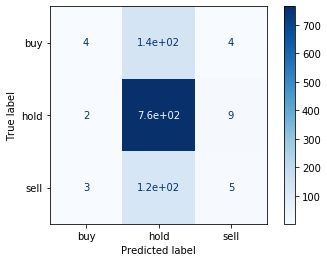

In [152]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tfidf_logReg_1, tfidf_test_vecs, test_df['rating_1'], cmap="Blues")

In [153]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(test_df['rating_1'], predictions, average='micro')

0.7336492890995261

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
rf = RandomForestClassifier(n_estimators=100)
X_train = tfidf_train_vecs
y_train = train_df['rating_1']
X_test = tfidf_test_vecs
y_test = test_df['rating_1']
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.7308056872037915

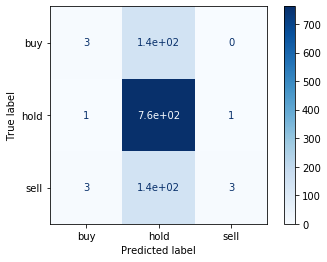

In [252]:
plot_confusion_matrix(rf, X_test, y_test, cmap="Blues")

In [162]:
importances = rf.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names()
df = pd.DataFrame({"Feature": feature_names,
                   "Importance": importances
                  })


In [165]:
df.sort_values("Importance", ascending=False).head(10)

,Feature,Importance
29348,morning,0.004100
1587,afternoon,0.003580
17941,gaap,0.001487
30116,nasdaq,0.001363
19333,gross,0.001212
30890,non,0.001068
8859,cloud,0.001047
1363,adoption,0.001032
22025,increase,0.000976
37435,reduce,0.000958


In [182]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.05, 0.5],
             }

model = LogisticRegression()

grid = GridSearchCV(model, param_grid, verbose=3, scoring='precision')

In [185]:
from sklearn.pipeline import Pipeline
# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 71.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 87.2min finished


In [191]:
predictions_test = best_clf.predict(X_test)

In [192]:
predictions_train = best_clf.predict(X_train)

In [193]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_test,
                            target_names=["sell", "hold", "buy"]))

              precision    recall  f1-score   support

        sell       0.80      0.03      0.05       146
        hold       0.74      1.00      0.85       776
         buy       0.33      0.01      0.01       133

    accuracy                           0.74      1055
   macro avg       0.62      0.34      0.31      1055
weighted avg       0.70      0.74      0.63      1055



In [195]:
train_df['predictions'] = pd.Series(predictions_train)
train_df[rejoin_df]

In [196]:
test_df['predictions'] = pd.Series(predictions_test)

In [198]:
train_df.set_index('key').join(test_df.set_index('key'))

KeyError: "None of ['key'] are in the columns"

In [204]:
frames = []
rejoin_df = pd.concat([test_df, train_df])

In [206]:
rejoin_df = rejoin_df.sort_index()

In [211]:
rejoin_df[rejoin_df['return_1'] == 'hold']

C:\Users\cdubi\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,title,url,date,Symbol,GICS Sector,GICS Sub-Industry,date_plus_28,date_plus_7,date_plus_1,Price,...,return_28,return_7,return_1,rating_28,rating_7,rating_1,body,body_tokens,body_str,predictions


In [212]:
rejoin_df[rejoin_df['predictions'] == rejoin_df['return_1']]

,title,url,date,Symbol,GICS Sector,GICS Sub-Industry,date_plus_28,date_plus_7,date_plus_1,Price,...,return_28,return_7,return_1,rating_28,rating_7,rating_1,body,body_tokens,body_str,predictions


In [226]:
print(list(range(10,101,10)))

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [257]:
print(list(range(100,800,100)))

[100, 200, 300, 400, 500, 600, 700]
